In [1]:
#  project ex 2

import numpy as np
from scipy.constants import speed_of_light
from scipy.integrate import quad
import scipy as sp
import matplotlib.pyplot as plt

c = speed_of_light

# ex2
def frequency_spaceing(lower, upper, n):
    '''Generates a 1D array of equally spaced frequency values (in Hz)
    
    Args:
    lower = lower bound frequency for array (inclusive)
    upper = upper bound frequency for arary (inclusive)
    n = number of samples in the array
    
    Returns:
    frequency_array = a 1D array of equally spaced frequency values (in Hz)'''
    
    frequency_array = np.linspace(lower, upper, n)
    
    return frequency_array

# ex3
def stokes_q_u(f, phi, xi_knot, p):
    '''Calculates Stokes Q and U as a function of frequency
    
    Args:
    f = an array of frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    p_tilda = single complex array of complex polarization, real is Q, imaginary is U
    '''

    p_tilda = p * np.exp(2.0j *(xi_knot + (c / f)**2 * phi ))
    
    return p_tilda



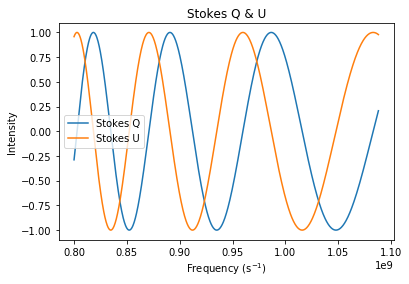

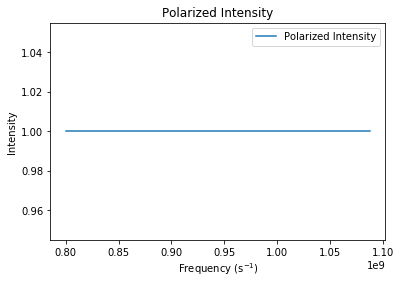

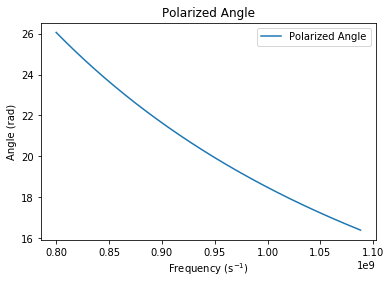

In [2]:
# ex4

def polarization_angle(f, phi, xi_knot):
    '''Computes the new polarization angle as a function of frequency
    
    Args:
    f = an array of frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    
    Returns
    xi - an array of the polarization angles (in rad)'''
    
    xi = xi_knot + ((c / f)**2) * phi
    
    return xi

def plot_stokes_intensity_angle(f, phi, xi_knot, p):
    '''Plots stokes Q and U, polarized intensity and polarized angle
    
    Args:
    f = an array of frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    3 plots'''
    
    # plot 1 stokes q/u seperatly on y axis, freq on x
    p_tilda = stokes_q_u(f, phi, xi_knot, p)
    
    q = np.real(p_tilda)
    u = np.imag(p_tilda)
    
    plt.figure()
    plt.plot(f, q, label='Stokes Q')
    plt.plot(f, u, label='Stokes U')
    plt.xlabel('Frequency (s$^{-1}$)')
    plt.ylabel('Intensity')
    plt.title('Stokes Q & U')
    plt.legend()
    plt.savefig('stokes.pdf', dpi=400)
    plt.show()
    
    # plot 2 polarized intensity on y, freq on x
    
    p = np.abs(p_tilda)
    
    plt.figure()
    plt.plot(f, p, label='Polarized Intensity')
    plt.xlabel('Frequency (s$^{-1}$)')
    plt.ylabel('Intensity')
    plt.title('Polarized Intensity')
    plt.legend()
    plt.savefig('polarized.pdf', dpi=400)
    plt.show()
   
    
    # plot 3 polarized angle on y, freq on x
    
    xi = polarization_angle(f, phi, xi_knot)
    
    plt.figure()
    plt.plot(f, xi, label='Polarized Angle')
    plt.xlabel('Frequency (s$^{-1}$)')
    plt.ylabel('Angle (rad)')
    plt.title('Polarized Angle')
    plt.legend()
    plt.savefig('anlge.pdf', dpi=400)
    plt.show()
    

    
    return
    
    
a = frequency_spaceing(800000000,1088000000,800)

plot_stokes_intensity_angle(a, 150, 5, 1)
        

In [3]:
# ex6

def bandwidth_avg_polarization(f, ban, phi, xi_knot, p):
    '''Computes the bandwidth averaged complex polarization of a single frequency channel
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
    
    x = f
    
    def func_n1(x, phi, xi_knot, p):
        return  np.real(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi ))) # integrand
    
    def func_n2(x, phi, xi_knot, p):
        return np.imag(p * np.exp(2.0j *(xi_knot + (c / x)**2 * phi )))
    
    i1 = quad(func_n1, a, b, args=(phi, xi_knot, p))[0] # integral
    
    i2 = quad(func_n2, a, b, args=(phi, xi_knot, p))[0]
    
    i = i1 + 1.0j*i2
    
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda



# ex7
def bandwidth(f_array):
    '''Returns bandwidth per channel of a frequency array'''
    
    ban = f_array[1] - f_array[0]
    
    return ban

def bandwidth_avg_array(f, phi, xi_knot, p):
    ''' computes the bandwidth averaged polarization for an array of channels

    Args:
    f = a 1D array of equally spaced frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = an array of the average complex polarization for each channel, real is Q, imaginary is U
    '''
    avg_p_tilda = 1.0j * f
    ban = bandwidth(f)
    n = len(f)
    for i in range(n): # this for loop may be unnessary, need to test if doesnt break if given an array
        avg_p_tilda[i] = bandwidth_avg_polarization(f[i], ban, phi, xi_knot, p)
    #avg_p_tilda = bandwidth_avg_polarization(f, ban, phi, xi_knot, p)
    
    return avg_p_tilda



In [4]:
# test of differnt integration method
from scipy import integrate 

#6
def bandwidth_avg_polarizationv2(f, ban, phi, xi_knot, p):
    '''Computes the bandwidth averaged complex polarization of a single frequency channel
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
    
    n = 500
    
    x = np.linspace(a, b, n)
    
    dx = (a - b) / n
    
    y_real = np.real(p * np.exp(2.0j *(xi_knot + (((c / x)**2) * phi ))))
    y_imag = np.imag(p * np.exp(2.0j *(xi_knot + (((c / x)**2) * phi ))))
    
    i1 = integrate.simps(y_real, x, dx)
    i2 = integrate.simps(y_imag, x, dx)
    
    i = i1 + 1.0j*i2
    
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda

def bandwidth_avg_polarizationv2_2(f, ban, phi, xi_knot, p): # def is a lie, numericaly solves the analytical 
    '''Computes the bandwidth averaged complex polarization of a single frequency channel
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity 
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
    n = 500
    
    x = np.linspace(a, b, n)
    
    dx = (a - b) / n
    
    y_real = np.real(np.exp(-2.0j * (((c / x)**2) * phi )))
    y_imag = np.imag(np.exp(-2.0j * (((c / x)**2) * phi )))
    
    i1 = integrate.simps(y_real, x, dx)
    i2 = integrate.simps(y_imag, x, dx)
 
    
    i = i1 + 1.0j*i2
    
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda



# 8 v2
def analytic_solution_polarization_integral_channelv2(f, ban, phi, xi_knot, p):
    '''Calculates the average analytic solution to the channel polarization integral for 1 channel
    
    Based on equation 13 of Schnitzeler & Lee (2015)
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
                   
    funct1 = (a * np.exp(-2.0j * phi * ((c/a)**2)))
    funct2 = (c * np.sqrt((np.abs(phi)*np.pi)))
    funct3 = (1.0j + np.sign(phi))
    funct4 = (sp.special.erf(np.sqrt(np.abs(phi)) * (c / a)*(1.0j + np.sign(phi))))
    ya = funct1 + (funct2 * funct3 * funct4)
    
    funct1 = (b * np.exp(-2.0j * phi * ((c/b)**2)))
    funct2 = (c * np.sqrt((np.abs(phi)*np.pi)))
    funct3 = (1.0j + np.sign(phi))
    funct4 = (sp.special.erf(np.sqrt(np.abs(phi)) * (c / b)*(1.0j + np.sign(phi))))
    yb = funct1 + (funct2 * funct3 * funct4)
                     
    i = yb - ya
    avg_p_tilda = i / ban # mean value thm
    
    
    return avg_p_tilda


In [5]:
# ex8
def analytic_solution_polarization_integral_channel(f, ban, phi, xi_knot, p):
    '''Calculates the average analytic solution to the channel polarization integral for 1 channel
    
    Based on equation 13 of Schnitzeler & Lee (2015)
    
    Args:
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = the average complex polarization, for the bandwidth, real is Q, imaginary is U
    '''
    a = f - (ban / 2)
    b = f + (ban / 2) # integral start and stop values
                   
    funct1 = (a * np.exp(-2.0j * phi * ((c/a)**2)))
    funct2 = (c * np.sqrt((np.abs(phi)*np.pi)))
    funct3 = (1.0j + np.sign(phi))
    funct4 = (sp.special.erf(np.sqrt(np.abs(phi)) * (c / a)*(1.0j + np.sign(phi))))
    ya = funct1 + (funct2 * funct3 * funct4)
    
    funct1 = (b * np.exp(-2.0j * phi * ((c/b)**2)))
    funct2 = (c * np.sqrt((np.abs(phi)*np.pi)))
    funct3 = (1.0j + np.sign(phi))
    funct4 = (sp.special.erf(np.sqrt(np.abs(phi)) * (c / b)*(1.0j + np.sign(phi))))
    yb = funct1 + (funct2 * funct3 * funct4)
                     
    i = yb - ya
    avg_p_tilda = i / ban # mean value thm
    
    return avg_p_tilda




def analytic_solution_polarization(f, phi, xi_knot, p):
    '''Calculates the analytic solution to the channel polarization integral
    
    Based on equation 13 of Schnitzeler & Lee (2015)
    
    Args:
    f = a 1D array of equally spaced frequency values (in Hz)
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    avg_p_tilda = an array of the average complex polarization for each channel, real is Q, imaginary is U'''
    avg_p_tilda = 1.0j * f
    ban = bandwidth(f)
    n = len(f)
    for i in range(n): # this for loop may be unnessary, need to test
        avg_p_tilda[i] = analytic_solution_polarization_integral_channel(f[i], ban, phi, xi_knot, p)
        
   # avg_p_tilda = analytic_solution_polarization_integral_channel(f, ban, phi, xi_knot, p)
    
    return avg_p_tilda
    

In [13]:
# ex 9
def percent_error(aprox, exact):
    '''Calculates the percent error from the aproximate value and the exact value for complex numbers
    
    Args:
    aprox = aproximate or numerical value
    exact = exact or analytical value or measured value
    
    Returns:
    A complex number, that is the percent error'''
    
    aprox_real = np.real(aprox)
    aprox_imag = np.imag(aprox)
    exact_real = np.real(exact)
    exact_imag = np .imag(exact)
    
    p1 = np.abs(np.abs(aprox_real - exact_real) / exact_real)
    
    p2 = np.abs(np.abs(aprox_imag - exact_imag) / exact_imag)
    
    
    return p1 + 1.0j * p2

def avg_percent_error(p_error_array):
    '''Calculates the average percent error for an array
    
    Args:
    p_error_array = an array where every value is the percent error
    
    Returns:
    A complex number of the mean percent error'''
    
    n = len(p_error_array)
    
    real = np.real(p_error_array)
    imag = np.imag(p_error_array)
    avg_real = np.sum(real) / n
    avg_imag = np.sum(imag) / n
    
    return avg_real + 1.0j*avg_imag

def compare(lower, upper, n,phi, xi_knot, p,):
    '''Compares the analytic to numeric solutions, for channels of
    different center frequencies and bandwidths
    
    Args:
    lower = lower bound frequency for array (inclusive)
    upper = upper bound frequency for arary (inclusvive)
    n = number of samples in the array for numerical solution
    m = number of samples in the array for analytical solution
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    A single value of the mean percent error of the two solutions.'''
    
    freq_num = frequency_spaceing(lower, upper, n)
  
    
    num_solution = bandwidth_avg_array(freq_num, phi, xi_knot, p)
    an_solution = analytic_solution_polarization(freq_num, phi, xi_knot, p)
    
    error = percent_error(num_solution, an_solution)
    
    avg_error = avg_percent_error(error)
    
    return avg_error


def plot_compare(lower, upper, n, phi, xi_knot, p,):
    '''Compares the analytic to numeric solutions, for channels of
    different center frequencies and bandwidths by plotting 
    
    Args:
    lower = lower bound frequency for array (inclusive)
    upper = upper bound frequency for arary (inclusvive)
    n = number of samples in the array for numerical solution
    m = number of samples in the array for analytical solution
    phi =  faraday depth value (in rad/m2)
    xi_knot = initial polarization angle (in rad)
    p = polarized intensity
    
    Returns:
    A single value of the mean percent error of the two solutions.'''
    
    freq_num = frequency_spaceing(lower, upper, n)
    
    
    
    num_solution = bandwidth_avg_array(freq_num, phi, xi_knot, p)
    an_solution = analytic_solution_polarization(freq_num, phi, xi_knot, p)

    
    q_num = np.real(num_solution)
    u_num = np.imag(num_solution)
    
    q_an = np.real(an_solution)
    u_an = np.imag(an_solution)
    
    plt.figure()
    plt.plot(freq_num, q_an,'b',label='Stokes Q Analytical')
    plt.plot(freq_num, u_an, 'r', label='Stokes U Analytical')
    plt.plot(freq_num, q_num, 'b--', label='Stokes Q Numerical')
    plt.plot(freq_num, u_num, 'r--',label='Stokes U Numerical')

    plt.xlabel('Frequency (s$^{-1}$)')
    plt.ylabel('Intensity')
    plt.title('Stokes Q & U')
    plt.legend()
    plt.savefig('compare.pdf', dpi=400)
    plt.show()

Wall time: 0 ns
8_test
(3.0119087169218153+6.119053371700943j)


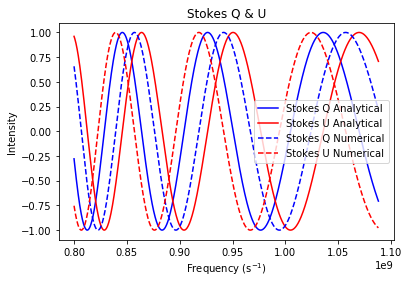

None


In [16]:
%time
a = frequency_spaceing(800000000,1088000000,800)



print('8_test')

print(compare(800000000, 1088000000, 800,10000, 0.5, 1,))
print(plot_compare(800000000, 1088000000, 800, 150, 0.5, 1,))

In [19]:
# ex 10

def half_max(f, ban):
    '''Finds the magnitude of faraday depth for intensity to drop to half
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Float of the faraday depth value of half max'''
    
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted = int(round(np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))))
    
    margin = int(round((ban / 2)))
    
    phi = np.linspace(predicted - margin , predicted + margin, int(0.5 *round(predicted)))
    num_pol = 1 * phi
    
    n = len(phi)
    epsilon = 0.005
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = phi[i]
            
    error = 100 * (np.abs(half_max -predicted)/half_max)
    return half_max, error

def plot_bandwidth_depolarization(f, ban):
    '''Plots the polarized intensity for the channel as a function of increasing faraday depth
    
    Args: 
    f = channel center frequency (in Hz)
    ban = bandwidth (in Hz)
    
    Returns:
    Plot of the polarized intensity as a function of increasing faraday depth'''
    
    #analytic
    
    #phi = np.linspace(0, 30000, 30000)
    
   # num_pol = 1 * phi
   
    fa = (f - 0.5 * ban)**2
    fb = (f + 0.5 * ban)**2
    
    xi_knot = 1
    p = 1
    
    predicted_phi = np.abs(np.sqrt(3) / (c**2 *((1/fa) - (1/fb))))
    
    phi = np.linspace(-10 * int(round(predicted_phi)), 10 *int(round(predicted_phi)), int(0.5 *round(predicted_phi)))
    num_pol = 1 * phi
    an_pol = 1 * num_pol
    
    epsilon = 0.005
    n = len(phi)
    for i in range(n):
        num_pol[i] = np.abs((bandwidth_avg_polarization(f, ban, phi[i], xi_knot, p)))
        if np.abs(num_pol[i] - 0.50) < epsilon:
            half_max = np.abs(phi[i])
        an_pol[i] = np.abs(analytic_solution_polarization_integral_channel(f, ban, phi[i], xi_knot, p))

    
    ymin = 0
    ymax = 1.2
    
    xmin = 1
    xmax = 500 
    
    plt.figure()
    plt.plot(phi, num_pol,'b')
    plt.plot(phi, an_pol,'r--',label='Analytical')
    plt.xlabel('Faraday Depth (rad/m$^2$)')
    plt.ylabel('Fractional Intensity')
    plt.vlines(half_max, 0, 1.0, colors='purple', linestyles='dashed', label='Faraday Depth of Half Max')
    plt.vlines(-half_max, 0, 1.0, colors='purple', linestyles='dashed',)
    plt.hlines(0.5, -10 * int(round(predicted_phi)), 10 * int(round(predicted_phi)), colors='black', linestyles='dashed', label='Half max')
    plt.title('Bandwidth Depolarization')
    #plt.legend('upper left')
    plt.savefig('bandwidth_depolarization.pdf', dpi=400)
    plt.show()
    
    return 
    

test2


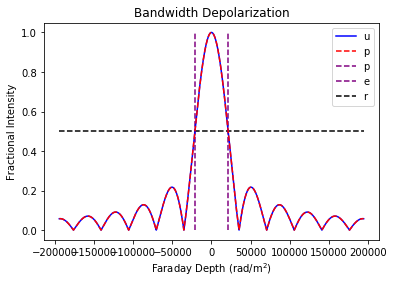

18.303467750549316


(21430.27907215437, 9.063246752946347)

In [18]:
%timeit
f = frequency_spaceing(800000000, 1088000000, 800)
ban = bandwidth(f)
print('test2')

import time
t0 = time.time()

plot_bandwidth_depolarization(900000000, ban)
t1 = time.time()
total = t1-t0
print(total)

half_max(900000000, ban)
